In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [143]:
warnings.filterwarnings("ignore")

In [144]:
# Importing the dataset
leads_data = pd.read_csv('Leads.csv')

# Creating a backup copy of the data
leads_backup = leads_data.copy()

# Displaying the first 10 rows of the data
leads_backup.head(10)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [145]:
# Checking the dimensions of the dataset
print("Dataset Dimensions:", leads_backup.shape)

# Displaying dataset information
print("\nDataset Info:")
leads_backup.info()

# Summarizing numerical features with transpose for better readability
print("\nStatistical Summary:")
print(leads_backup.describe().transpose())

# Counting the unique values in the 'Lead Number' column
unique_leads = leads_backup['Lead Number'].nunique()
print("\nNumber of Unique Lead Numbers:", unique_leads)


Dataset Dimensions: (9240, 37)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page V

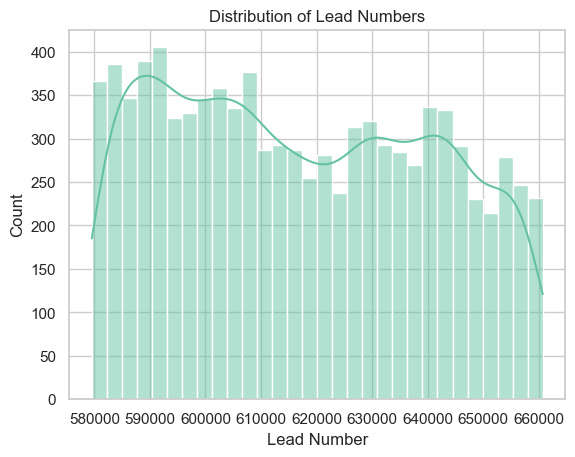

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of 'Lead Number' (or any numerical column)
sns.histplot(leads_backup['Lead Number'], kde=True, bins=30)
plt.title("Distribution of Lead Numbers")
plt.show()

In [147]:
leads_backup.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [148]:
# Counting unique values in the 'Lead Number' column
unique_lead_numbers = leads_backup['Lead Number'].nunique()
print("Number of Unique Lead Numbers:", unique_lead_numbers)

Number of Unique Lead Numbers: 9240


In [149]:
# Function to display the unique value distribution of categorical columns
def display_category_stats(dataframe, exclude_columns=[]):
    # Selecting categorical columns (object type)
    categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    
    # Exclude specified columns from analysis
    if exclude_columns:
        categorical_columns = [col for col in categorical_columns if col not in exclude_columns]
    
    # Loop through each column to display stats
    for col in categorical_columns:
        print('*' * 100)
        print(f"Unique Values in Column: {col}")
        print('*' * 100)
        print(dataframe[col].value_counts(normalize=True, dropna=False))
        print('\n')

# Checking unique value distribution in object columns of leads_backup
display_category_stats(leads_backup, exclude_columns=['Prospect ID', 'Lead Number'])

****************************************************************************************************
Unique Values in Column: Lead Origin
****************************************************************************************************
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64


****************************************************************************************************
Unique Values in Column: Lead Source
****************************************************************************************************
Lead Source
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing         

In [150]:
# Replacing all occurrences of 'Select' with NaN in the dataset
leads_backup.replace({'Select': np.nan}, inplace=True)

# Displaying updated dataset information
print("\nUpdated Dataset Info:")
leads_backup.info()


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit         

In [151]:
# Displaying the data types of each column
print("\nData Types of Columns:")
print(leads_backup.dtypes)


Data Types of Columns:
Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazin

In [152]:
# Check the count of missing values after replacement
missing_after_replacement = leads_backup.isnull().sum()
print("\nMissing Values After Replacement:")
print(missing_after_replacement)


Missing Values After Replacement:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                       

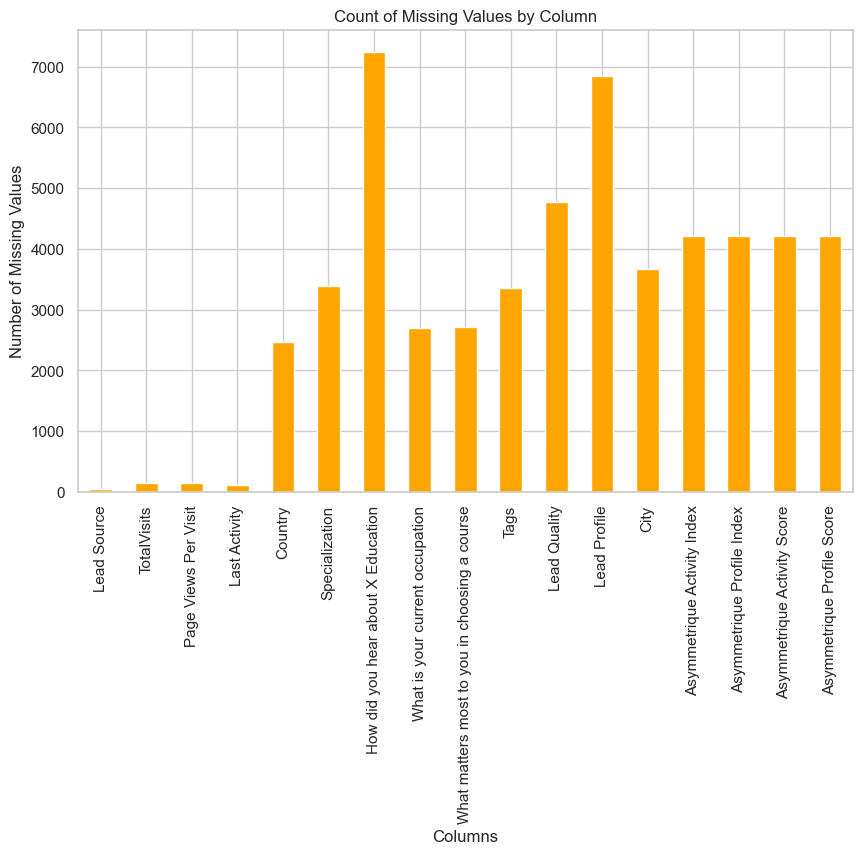

In [153]:
missing_counts = leads_backup.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only columns with missing values
missing_counts.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Count of Missing Values by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

In [154]:
single_value_columns = leads_backup.nunique() == 1
no_variance_cols = single_value_columns[single_value_columns].index

# Dropping columns that have no variance and no missing values
leads_backup.drop(no_variance_cols, axis=1, inplace=True)
print(f"Updated Dataset Dimensions: {leads_backup.shape}")

Updated Dataset Dimensions: (9240, 32)


In [155]:
# Calculating the percentage of missing values in each column
missing_percentage = round(leads_backup.isnull().sum() * 100 / leads_backup.shape[0], 2)
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)


Percentage of Missing Values in Each Column:
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article  

The following columns have over 40% missing data, and therefore, they will be removed from the dataset:

'How did you hear about X Education' with 78.46% missing values.
'Lead Profile' with 74.19% missing values.
'Lead Quality' with 51.6% missing values.
'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', and 'Asymmetrique Profile Score', each having 45.65% missing values.

In [156]:
columns_high_missing = [
    'How did you hear about X Education', 
    'Lead Quality', 
    'Lead Profile', 
    'Asymmetrique Activity Index', 
    'Asymmetrique Profile Index', 
    'Asymmetrique Activity Score', 
    'Asymmetrique Profile Score'
]

# Dropping the identified columns with very high missing values
leads_backup.drop(columns=columns_high_missing, axis=1, inplace=True)

# Checking updated dataset dimensions
print(f"Dataset Dimensions After Dropping High Missing Columns: {leads_backup.shape}")

Dataset Dimensions After Dropping High Missing Columns: (9240, 25)


In [157]:
# Identifying rows with more than 70% missing data
rows_high_missing = (leads_backup.isna().sum(axis=1) * 100 / leads_backup.shape[1]) > 70
rows_with_high_missing = rows_high_missing[rows_high_missing]

# Displaying rows with more than 70% missing data
print(f"Number of Rows with >70% Missing Data: {rows_with_high_missing.sum()}")
print("Indices of Rows with High Missing Data:")
print(rows_with_high_missing.index.tolist())

Number of Rows with >70% Missing Data: 0
Indices of Rows with High Missing Data:
[]


In [158]:
# Converting 'Lead Number' column to object data type
leads_backup['Lead Number'] = leads_backup['Lead Number'].astype('object')
print("\nUpdated Data Types for 'Lead Number':")
print(leads_backup['Lead Number'].dtypes)


Updated Data Types for 'Lead Number':
object


In [159]:
def print_unique_values(df, exclude_columns=[]):
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Excluding specified columns from the analysis
    if exclude_columns:
        object_columns = list(set(object_columns) - set(exclude_columns))
    
    # Printing unique value counts for each object column
    for column in object_columns:
        print('*' * 100)
        print(f"Unique Values in Column: {column}")
        print('*' * 100)
        print(df[column].value_counts(normalize=True, dropna=False))

# Checking the number of unique values in object columns, excluding 'Prospect ID' and 'Lead Number'
print_unique_values(leads_backup, exclude_columns=['Prospect ID', 'Lead Number'])

****************************************************************************************************
Unique Values in Column: Tags
****************************************************************************************************
Tags
NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number     

In [160]:
# Replacing specific 'Lead Origin' categories with 'Other'
leads_backup['Lead Origin'] = leads_backup['Lead Origin'].replace(
    ['Lead Add Form', 'Lead Import', 'Quick Add Form'], 'Other'
)

# Checking the distribution of 'Lead Origin' categories after replacement
print("Lead Origin Categories After Grouping:")
print(leads_backup['Lead Origin'].value_counts(dropna=False))

Lead Origin Categories After Grouping:
Lead Origin
Landing Page Submission    4886
API                        3580
Other                       774
Name: count, dtype: int64


In [161]:
# Replacing 'google' with 'Google' in 'Lead Source'
leads_backup['Lead Source'] = leads_backup['Lead Source'].replace({'google': 'Google'})

In [162]:
# Grouping smaller categories of 'Lead Source' into 'Other Sources'
# Specifying major categories to retain and grouping others under 'Other Sources'
major_sources = ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', np.nan]
leads_backup['Lead Source'] = leads_backup['Lead Source'].map(
    lambda x: x if x in major_sources else 'Other Sources'
)

# Checking the distribution of 'Lead Source' categories after grouping
print("\nLead Source Categories After Grouping:")
print(leads_backup['Lead Source'].value_counts(dropna=False))


Lead Source Categories After Grouping:
Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other Sources      345
NaN                 36
Name: count, dtype: int64


The columns "Last Activity" and "Last Notable Activity" indicate the most recent actions taken by the customer. These activities can be categorized into three primary groups:

Positive Actions: Includes behaviors such as sending SMS, visiting a webpage, converting to a lead, clicking an email link, submitting a form on the website, making initial contact, clicking the "view in browser" link, receiving an email, attending a booth at a tradeshow, or resubscribing to emails.

Neutral Actions: These actions involve opening an email, having a chat conversation via Olark, engaging in a phone conversation, or receiving an email.

Negative Actions: Includes behaviors like email bounces, being unreachable, unsubscribing, or marking an email as spam.



In [163]:
# Categorizing 'Last Activity' into three distinct groups based on the activity type

# Defining the activity groups
positive_activities = ['SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Link Clicked', 
                       'Form Submitted on Website', 'Approached upfront', 'View in browser link Clicked', 
                       'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Modified']

neutral_activities = ['Email Opened', 'Olark Chat Conversation', 'Had a Phone Conversation', 'Email Received']

negative_activities = ['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam']

# Replacing activity types with their respective group labels
leads_backup['Last Activity'] = leads_backup['Last Activity'].replace(positive_activities, 'Positive Behaviour')
leads_backup['Last Activity'] = leads_backup['Last Activity'].replace(neutral_activities, 'Neutral Behaviour')
leads_backup['Last Activity'] = leads_backup['Last Activity'].replace(negative_activities, 'Negative Behaviour')

# Display the distribution of the activity groups
leads_backup['Last Activity'].value_counts(dropna=False)


Last Activity
Neutral Behaviour     4442
Positive Behaviour    4213
Negative Behaviour     482
NaN                    103
Name: count, dtype: int64

We have 103 missing data points, which we will impute with 'Neutral'. This approach is both logical from a business perspective and statistically supported, as the mode value is 'Neutral'.

In [164]:
# Grouping 'Last Notable Activity' into 3 groups based on the activity type

leads_backup['Last Notable Activity'] = leads_backup['Last Notable Activity'].replace(positive_activities, 'Positive Behaviour')
leads_backup['Last Notable Activity'] = leads_backup['Last Notable Activity'].replace(neutral_activities, 'Neutral Behaviour')
leads_backup['Last Notable Activity'] = leads_backup['Last Notable Activity'].replace(negative_activities, 'Negative Behaviour')

# Display the distribution of the activity groups
leads_backup['Last Notable Activity'].value_counts(dropna=False)


Last Notable Activity
Positive Behaviour    6074
Neutral Behaviour     3025
Negative Behaviour     141
Name: count, dtype: int64

In [165]:
# Grouping all countries into 3 groups: India, USA, and Other

leads_backup['Country'] = leads_backup['Country'].map(lambda x: x if x in ['India', 'United States', np.nan] else 'Other Countries')

# Display the new groups in 'Country'
leads_backup['Country'].value_counts(dropna=False)

Country
India              6492
NaN                2461
Other Countries     218
United States        69
Name: count, dtype: int64

The 'Country' column is heavily skewed, with almost 96% of entries from India, 1% from the United States, and the remaining 3% from other countries. We'll group the rest of the countries under 'Other Countries'.

The 'Specialization' column has 18 classes, which we'll group into the following three categories:

Domain Specialization: 'Banking, Investment And Insurance', 'Media and Advertising', 'Travel and Tourism', 'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business'

Management Specialization: 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management'

Business Specialization: 'Business Administration', 'International Business', 'Services Excellence'

For missing values, we'll create a new category called 'Not Disclosed'. This will be helpful during Exploratory Data Analysis (EDA) to test the hypothesis that customers who disclose their specialization have the same chance of taking the course as those who do not. If we can reject this hypothesis, we'll keep 'Not Disclosed' as a separate category even during model building; otherwise, we'll statistically impute the missing values using the mode.

In [166]:
# Grouping all specializations into 4 major categories

domain_sp = ['Banking, Investment And Insurance', 'Media and Advertising', 'Travel and Tourism', 'Healthcare Management', 
             'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business']

management_sp = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 
                 'IT Projects Management', 'Supply Chain Management']

business_sp = ['Business Administration', 'International Business', 'Services Excellence']

leads_backup['Specialization'] = leads_backup['Specialization'].replace(domain_sp, 'Domain Specialization')
leads_backup['Specialization'] = leads_backup['Specialization'].replace(management_sp, 'Management Specialization')
leads_backup['Specialization'] = leads_backup['Specialization'].replace(business_sp, 'Domain Business Specialization')
leads_backup['Specialization'].fillna('Not Disclosed', inplace=True)

# Display the new specialization groups
leads_backup['Specialization'].value_counts(dropna=False)

Specialization
Management Specialization         3880
Not Disclosed                     3380
Domain Specialization             1359
Domain Business Specialization     621
Name: count, dtype: int64

What is your current occupation' has 2 major classes and high NaN values (people did not disclose). We'll club small classes and will create 'Not Disclosed' class for missing values and will check if there is any significant difference (same as we are doing above for Specialization).

In [167]:
# Fill missing values and group specific occupations into 'Other' category
leads_backup['What is your current occupation'].fillna('Not Disclosed', inplace=True)
leads_backup['What is your current occupation'] = leads_backup['What is your current occupation'].replace(['Housewife', 'Businessman'], 'Other')

# Display the unique values in the 'Occupation' column
leads_backup['What is your current occupation'].value_counts(dropna=False)


What is your current occupation
Unemployed              5600
Not Disclosed           2690
Working Professional     706
Student                  210
Other                     34
Name: count, dtype: int64

In [168]:
#renaming columns

# Renaming columns to shorter, more convenient names
leads_backup.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)
leads_backup.rename(columns={'What matters most to you in choosing a course': 'Reason_choosing'}, inplace=True)

<Figure size 2000x2000 with 0 Axes>

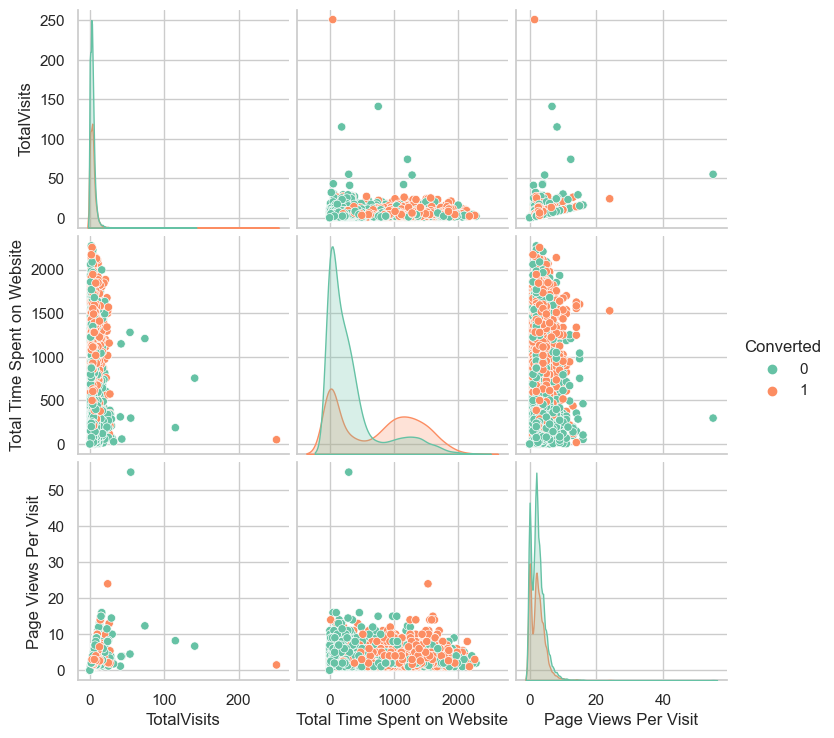

In [169]:
# Pairplot of all numerical features, colored by conversion status

plt.figure(figsize=[20, 20])
sns.pairplot(leads_backup.select_dtypes(include=['int64', 'float64']), hue='Converted', diag_kind='kde')
plt.show()

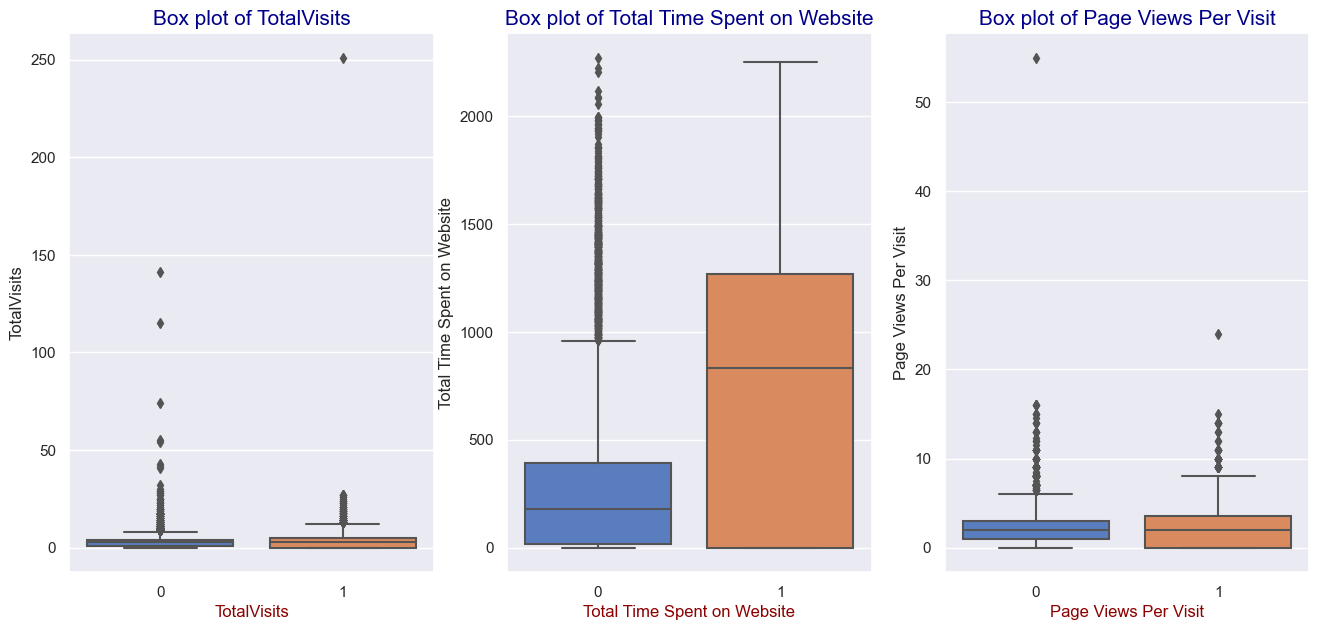

In [170]:
# Box plot for selected numeric features based on conversion status

numeric_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

sns.set(font_scale=1)
plt.figure(figsize=[16, 7])

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    plot_title = f'Box plot of {col}'
    x_label = f'{col}'
    plot = sns.boxplot(data=leads_backup, y=col, x='Converted', palette='muted')
    plot.set_title(plot_title, fontdict={'fontsize': 15, 'color': 'darkblue'})
    plot.set_xlabel(x_label, fontdict={'fontsize': 12, 'color': 'darkred'})

The median value of 'Total Time Spent on Website' for converted leads is significantly higher than for non-converted leads. The team should focus on customers who spend more time on the website, as they have a higher likelihood of conversion.

There are numerous outliers in 'Total Visit' for leads with Converted = 0. Many customers visit the website frequently but do not enroll in the course. The team should investigate the reasons behind this, which could include financial issues, searching for courses not currently offered by X Education, or finding better options from competitors.

There are also many outliers in the 'Total Time Spent on Website' column for leads with Converted = 0.



# Checking percentile values for 'Page Views Per Visit'
page_views_percentiles = leads_backup['Page Views Per Visit'].quantile([.01, .05, .5, .75, .9, .95, .99, 1]).values
print("Page Views Per Visit Percentiles:", page_views_percentiles)

# Removing observations where 'Page Views Per Visit' > 9
leads_backup = leads_backup[leads_backup['Page Views Per Visit'] <= 9]

In [171]:
# Checking percentile values for 'Page Views Per Visit'
page_views_percentiles = leads_backup['Page Views Per Visit'].quantile([.01, .05, .5, .75, .9, .95, .99, 1]).values
print("Page Views Per Visit Percentiles:", page_views_percentiles)

Page Views Per Visit Percentiles: [ 0.  0.  2.  3.  5.  6.  9. 55.]


In [172]:
# Removing observations where 'Page Views Per Visit' > 9
leads_backup = leads_backup[leads_backup['Page Views Per Visit'] <= 9]

In [173]:
# Checking percentile values for 'Total Visits'
total_visits_percentiles = leads_backup['TotalVisits'].quantile([.01, .05, .5, .75, .9, .95, .99, 1]).values
print("Total Visits Percentiles:", total_visits_percentiles)

Total Visits Percentiles: [  0.     0.     3.     5.     7.     9.    16.73 251.  ]


In [174]:
# Removing observations where 'TotalVisits' > 16.93
leads_backup = leads_backup[leads_backup['TotalVisits'] <= 16.93]

In [175]:
# Checking percentile values for 'Total Time Spent on Website'
time_spent_percentiles = leads_backup['Total Time Spent on Website'].quantile([.01, .05, .5, .75, .9, .95, .99, 1]).values
print("Total Time Spent on Website Percentiles:", time_spent_percentiles)

Total Time Spent on Website Percentiles: [   0.      0.    240.    911.   1370.   1553.   1838.28 2272.  ]


In [176]:
# Removing observations where 'Total Time Spent on Website' > 1840.27
leads_backup = leads_backup[leads_backup['Total Time Spent on Website'] <= 1840.27]

In [177]:
# Calculating the percentage of observations dropped due to outliers
dropped_percentage = 100 - (leads_backup.shape[0] * 100 / 9240)
print(f'% of observation dropped as outlier: {dropped_percentage:.2f}%')

% of observation dropped as outlier: 4.22%


In [178]:
# Output summary
print(f"Outliers removed: {dropped_percentage:.2f}% of total data, which is below the 5% threshold")

Outliers removed: 4.22% of total data, which is below the 5% threshold


In [179]:
# Define all relevant categorical columns
cat_cols = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
    'Specialization', 'Occupation', 'Reason_choosing', 'Search', 'Newspaper Article',
    'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'City',
    'A free copy of Mastering The Interview', 'Last Notable Activity', 'Tags'
]

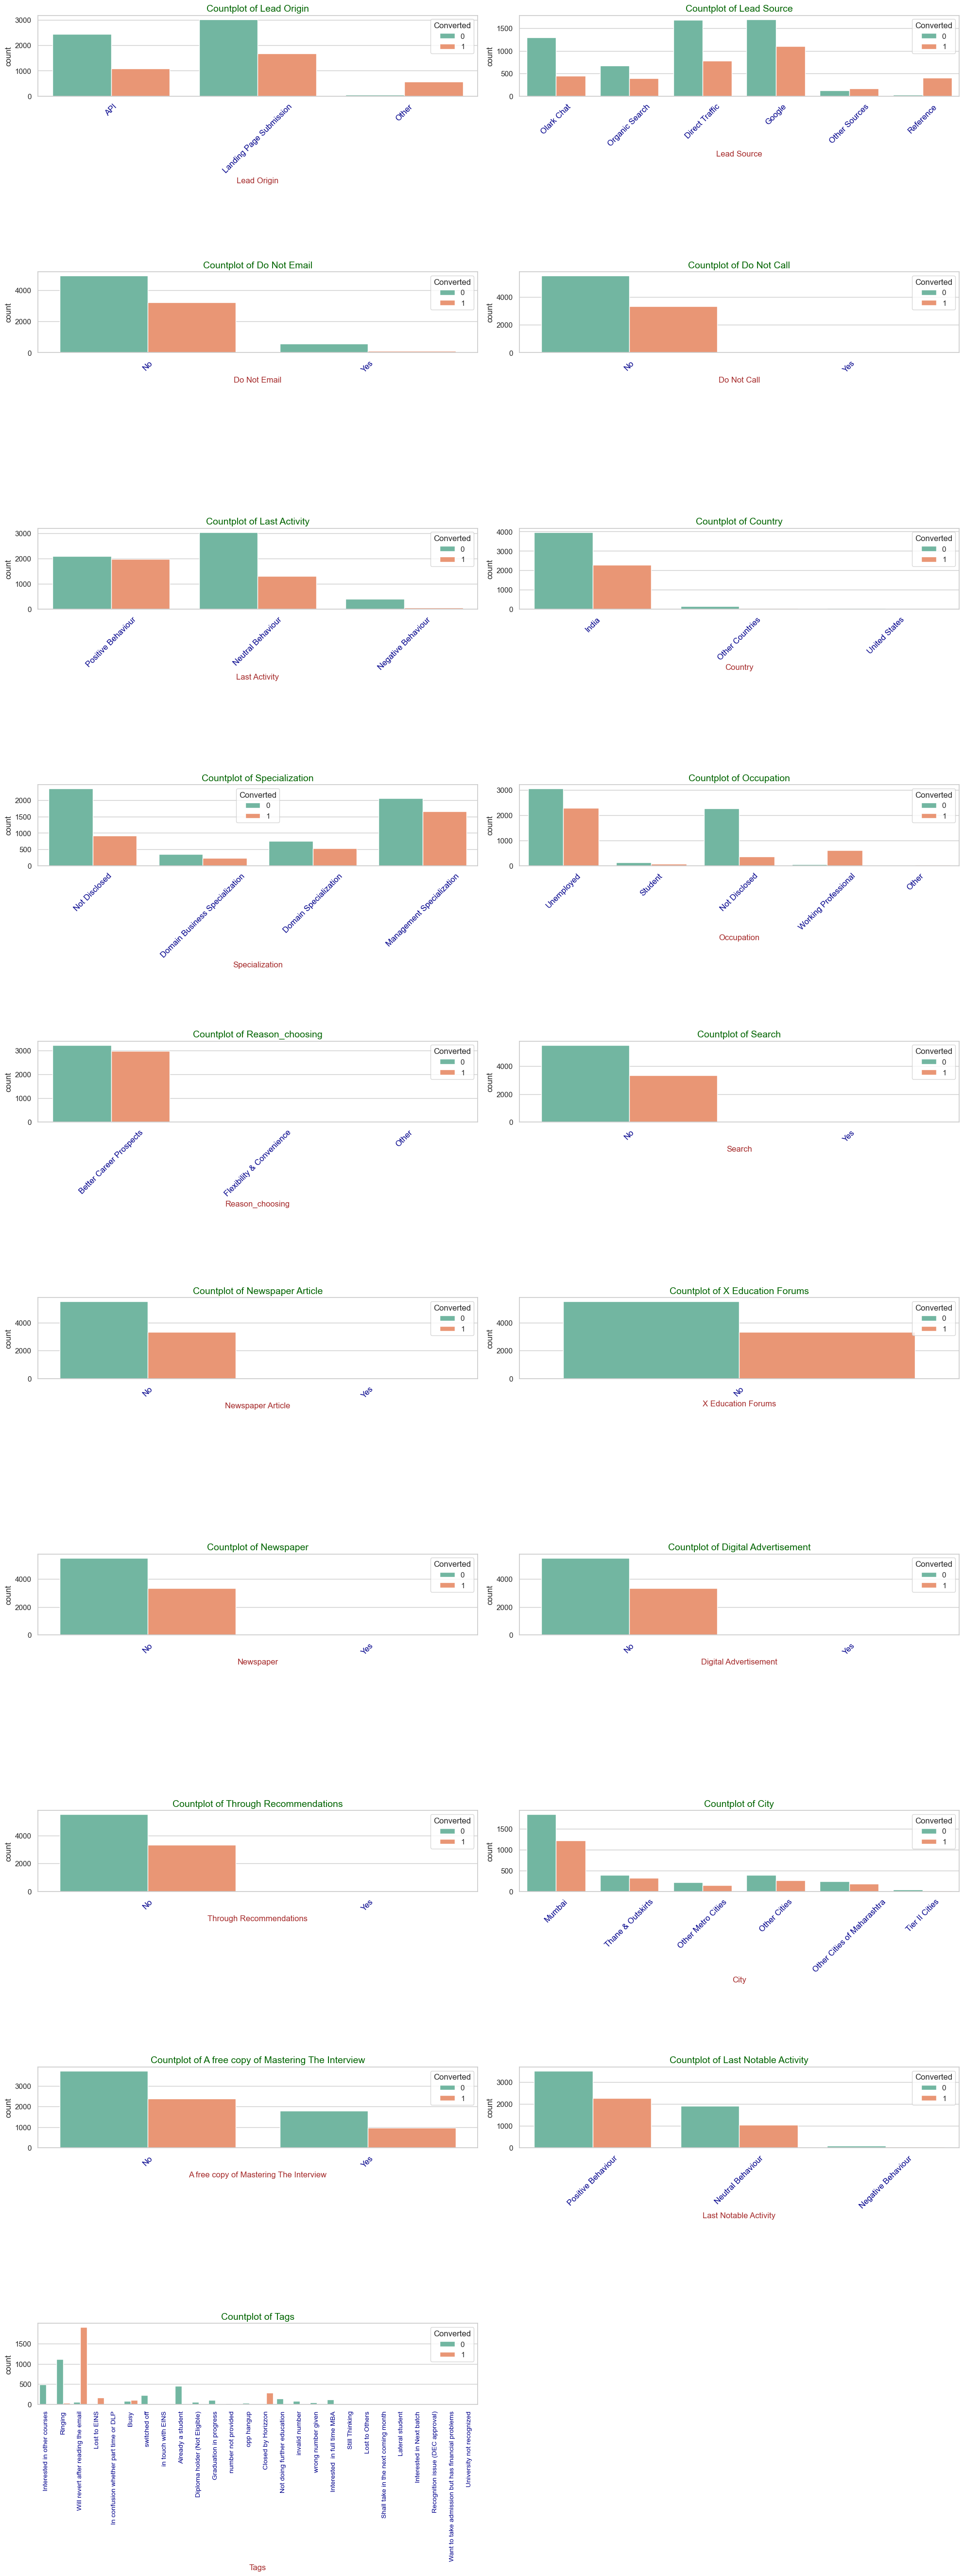

In [180]:
# Set the style and color palette for the countplot
sns.set_style("whitegrid")
sns.set_palette("Set2")  # A more vibrant color palette for better clarity

# Create a large figure to hold all the subplots
plt.figure(figsize=[20, 55])

# Loop through each categorical column and create countplots
for i, cat_col in enumerate(cat_cols, 1):
    title_text = f'Countplot of {cat_col}'
    ax = plt.subplot(11, 2, i)  # Arrange the subplots in a grid (11 rows, 2 columns)
    
    # Customize the x-axis labels for better readability
    if cat_col == 'Tags':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontdict={'fontsize': 10, 'color': 'darkblue'})
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontdict={'fontsize': 12, 'color': 'darkblue'})
    
    # Add a title and x-axis label
    ax.set_title(title_text, fontdict={'fontsize': 14, 'color': 'darkgreen'})
    ax.set_xlabel(cat_col, fontsize=12, color='brown')
    
    # Create the countplot with the 'Converted' hue for comparison
    sns.countplot(data=leads_backup, x=cat_col, hue='Converted', ax=ax)

# Show the final plot
plt.tight_layout()
plt.show()



**Inferences:**

1. Leads originating from the 'Other' category have a high likelihood of successful conversion.
2. The 'Reference' lead source boasts a very high success rate. The team should prioritize referenced customers. Although 'Other Sources' contribute a smaller number of customers, they have a strong conversion rate. Customers arriving through 'Organic Search' also have a significantly higher chance of successful conversion.
3. Customers who exhibit 'Positive Behaviour' in their 'Last Activity' are more likely to convert successfully.
4. The majority of customers are from India and have Management Specializations.
5. Individuals who specify their specializations on the form are more likely to opt for the course.
6. Most customers interested in the campaigns are unemployed. Working professionals have a very high likelihood of successful conversion. The sales team should launch a campaign to reach more working professionals.
7. Individuals who mention their employment status when filling out the forms have a higher chance of successful conversion.


Data Preparation

In [181]:
leads_backup1= leads_backup.copy()
leads_backup1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Positive Behaviour
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Ringing,NaN,No,Neutral Behaviour
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Neutral Behaviour
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Ringing,Mumbai,No,Positive Behaviour
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Positive Behaviour


In [182]:
# Display column names of the backup DataFrame
leads_backup.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Occupation', 'Reason_choosing', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [183]:
# Drop unnecessary columns from leads_backup1
leads_backup1.drop(['Last Activity', 'Last Notable Activity', 'Tags', 'Prospect ID', 'Lead Number'], axis=1, inplace=True)

# Display the shape of leads_backup1
leads_backup1.shape


(8850, 20)

In [184]:
# Performing train-test split

# Separate the target variable 'Converted' from the feature set
target_variable = leads_backup1.pop('Converted')

# Assign the features to a variable
feature_data = leads_backup1

# Split the dataset into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(feature_data, target_variable, test_size=0.3, random_state=100)


In [185]:
# Checking the shape of the training data
X_train_set.shape


(6195, 19)

In [186]:
# Checking the shape of the training target variable
y_train_set.shape

(6195,)

In [187]:
# Checking missing values in different columns
leads_backup1.isna().sum()


Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Do Not Call                                  0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Country                                   2321
Specialization                               0
Occupation                                   0
Reason_choosing                           2641
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
City                                      3557
A free copy of Mastering The Interview       0
dtype: int64

In [188]:
# Imputing 'Lead Source' in the training and testing data with the mode value calculated from the training data only
lead_source_imputer = X_train_set['Lead Source'].mode()[0]
X_train_set['Lead Source'].fillna(lead_source_imputer, inplace=True)
X_test_set['Lead Source'].fillna(lead_source_imputer, inplace=True)


In [189]:
# Imputing 'Country' in train and test data with the mode value calculated from the training data only
country_imputer_value = X_train_set['Country'].mode()[0]
X_train_set.Country.fillna(country_imputer_value, inplace=True)
X_test_set.Country.fillna(country_imputer_value, inplace=True)

# Imputing 'Reason_choosing' in train and test data with the mode value calculated from the training data only
reason_imputer_value = X_train_set['Reason_choosing'].mode()[0]
X_train_set['Reason_choosing'].fillna(reason_imputer_value, inplace=True)
X_test_set['Reason_choosing'].fillna(reason_imputer_value, inplace=True)

# Imputing 'City' in train and test data with the mode value calculated from the training data only
city_imputer_value = X_train_set['City'].mode()[0]
X_train_set.City.fillna(city_imputer_value, inplace=True)
X_test_set.City.fillna(city_imputer_value, inplace=True)

# Imputing 'TotalVisits' in train and test data with the median value calculated from the training data only
total_visits_imputer_value = X_train_set['TotalVisits'].median()
X_train_set.TotalVisits.fillna(total_visits_imputer_value, inplace=True)
X_test_set.TotalVisits.fillna(total_visits_imputer_value, inplace=True)

# Imputing 'Page Views Per Visit' in train and test data with the median value calculated from the training data only
page_views_imputer_value = X_train_set['Page Views Per Visit'].median()
X_train_set['Page Views Per Visit'].fillna(page_views_imputer_value, inplace=True)
X_test_set['Page Views Per Visit'].fillna(page_views_imputer_value, inplace=True)



In [190]:
# Checking missing values in X_train
X_train_set.isna().any()

# Checking missing values in X_test
X_test_set.isna().any()


Lead Origin                               False
Lead Source                               False
Do Not Email                              False
Do Not Call                               False
TotalVisits                               False
Total Time Spent on Website               False
Page Views Per Visit                      False
Country                                   False
Specialization                            False
Occupation                                False
Reason_choosing                           False
Search                                    False
Newspaper Article                         False
X Education Forums                        False
Newspaper                                 False
Digital Advertisement                     False
Through Recommendations                   False
City                                      False
A free copy of Mastering The Interview    False
dtype: bool

In [191]:
# Performing encoding for binary categorical columns
binary_class_columns = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Replacing 'No' with 0 and 'Yes' with 1 for binary columns in both train and test datasets
X_test_set[binary_class_columns] = X_test_set[binary_class_columns].replace({'No': 0, 'Yes': 1})
X_train_set[binary_class_columns] = X_train_set[binary_class_columns].replace({'No': 0, 'Yes': 1})

# Performing get_dummies() for the remaining nominal categorical columns
multi_cat_columns = ['Lead Origin', 'Lead Source', 'Country', 'Specialization', 'Reason_choosing', 'Occupation', 'City']

# Generating dummy variables for the train and test datasets
dummy_train_data = pd.get_dummies(X_train_set[multi_cat_columns], drop_first=True)
dummy_test_data = pd.get_dummies(X_test_set[multi_cat_columns], drop_first=True)


In [192]:
# Joining dummy_train dataframe with X_train and dropping original columns
X_train_set = X_train_set.merge(dummy_train_data, how='inner', left_index=True, right_index=True)
X_train_set.drop(multi_cat_columns, axis=1, inplace=True)
X_train_set.shape




(6195, 35)

In [193]:
# Joining dummy_test dataframe with X_test and dropping original columns
X_test_set = X_test_set.merge(dummy_test_data, how='inner', left_index=True, right_index=True)
X_test_set.drop(multi_cat_columns, axis=1, inplace=True)
X_test_set.shape

(2655, 33)

In [194]:
# Performing MinMax Scaling on all numeric predictors
numeric_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = MinMaxScaler()

# Apply MinMaxScaler on the specified columns for X_train
X_train_set[numeric_columns] = scaler.fit_transform(X_train_set[numeric_columns])
X_train_set[numeric_columns].head()




,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7381,0.1875,0.255978,0.333333
1086,0.1875,0.470652,0.333333
1217,0.1250,0.119022,0.222222
3911,0.1875,0.883152,0.333333
7220,0.2500,0.872826,0.444444


In [195]:
# Performing Variance Thresholding and removing columns having lower variance than the threshold
variance_threshold = VarianceThreshold(threshold=0.001)

# Fit the variance threshold on X_train_set
variance_thresh_model = variance_threshold.fit(X_train_set)

# Get the columns that have high variance
columns_with_high_variance = variance_thresh_model.get_support()

# Columns with very low variance
low_variance_columns = X_train_set.loc[:, ~columns_with_high_variance].columns

# Exclude 'Reason_choosing_Other' manually from the low variance columns
# If it's in the low variance columns, remove it
low_variance_columns = [col for col in low_variance_columns if col != 'Reason_choosing_Other']

# Display the result
print(pd.Index(low_variance_columns))


Index(['Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Reason_choosing_Flexibility & Convenience'],
      dtype='object')


In [196]:
# Removing columns with low variance from train and test datasets
X_train_set = X_train_set.loc[:, columns_with_high_variance]
X_test_set = X_test_set.loc[:, columns_with_high_variance]



IndexError: Boolean index has wrong length: 35 instead of 33

In [197]:
# Get the intersection of columns from both train and test sets
common_columns = X_train_set.columns.intersection(X_test_set.columns)

# Reassign X_train_set and X_test_set with only the common columns
X_train_set = X_train_set[common_columns]
X_test_set = X_test_set[common_columns]

# Now both X_train_set and X_test_set should have the same columns
print(X_train_set.shape)
print(X_test_set.shape)


(6195, 27)
(2655, 27)


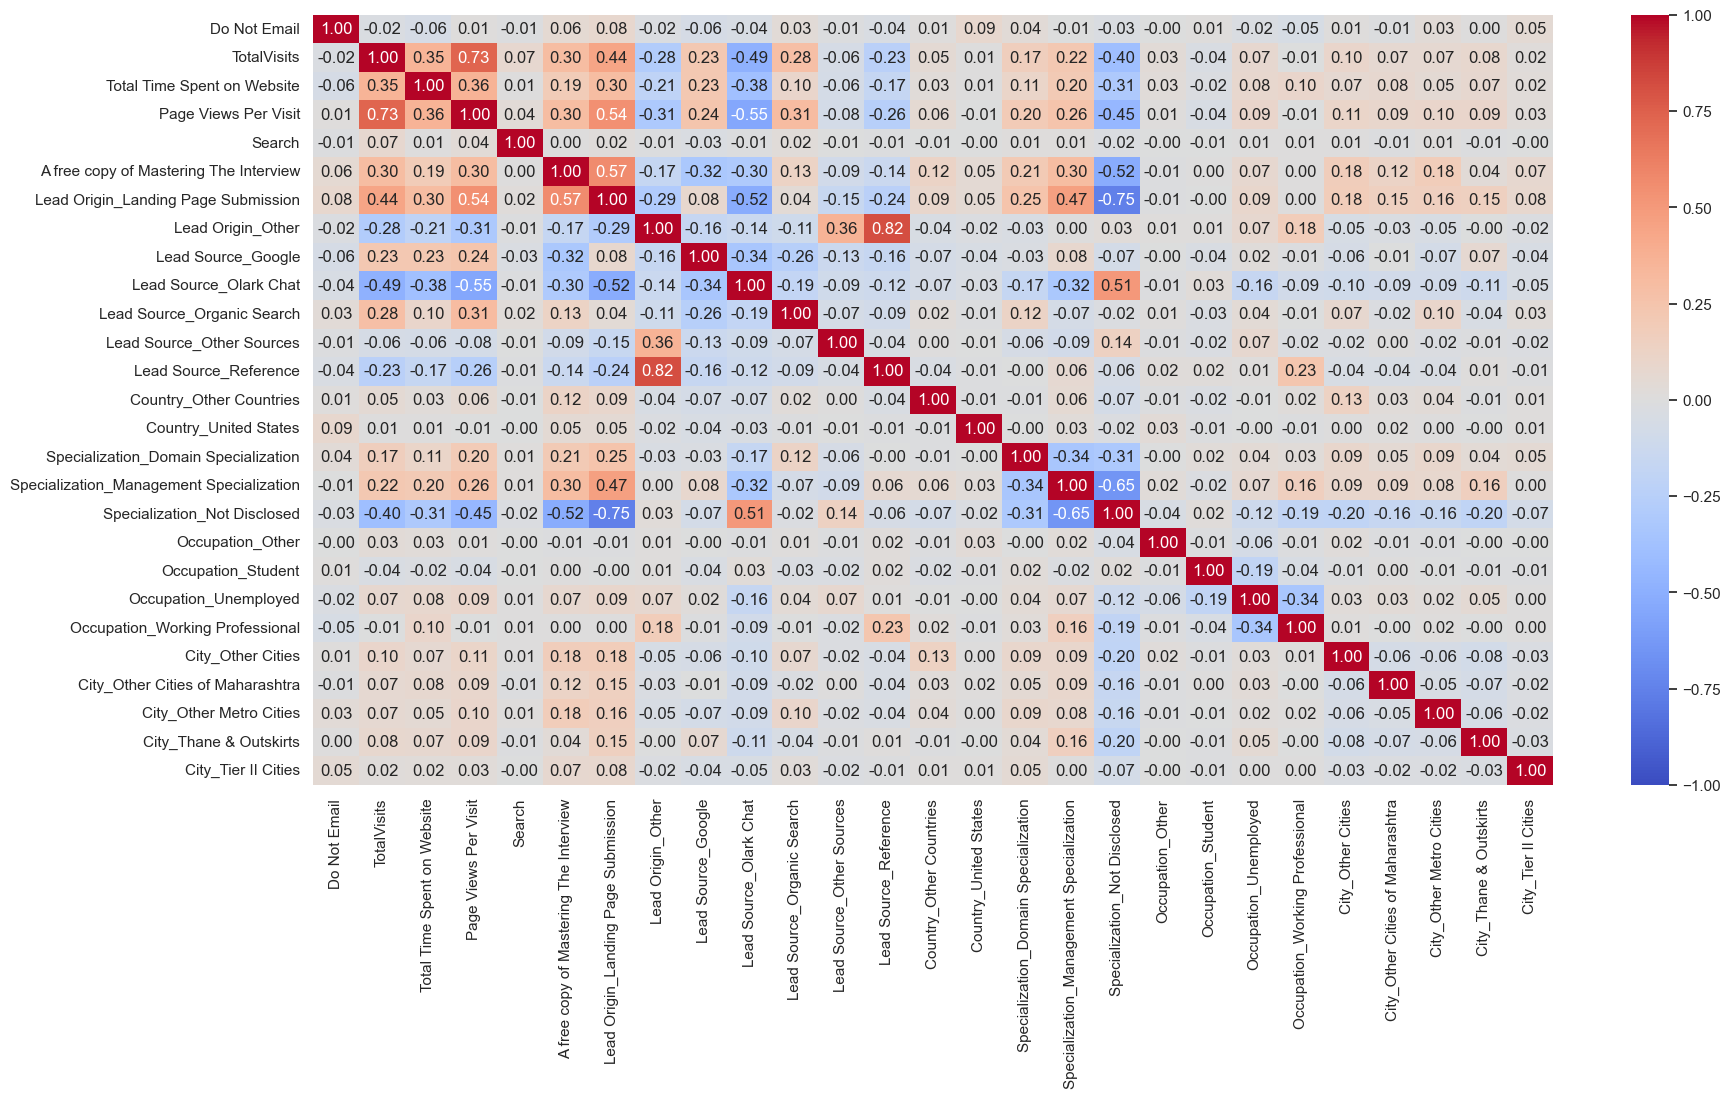

In [198]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train_set.corr(),annot = True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

In [199]:
X_test_set.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Country_Other Countries',
       'Country_United States', 'Specialization_Domain Specialization',
       'Specialization_Management Specialization',
       'Specialization_Not Disclosed', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

In [200]:
# Droping the columns from X_train and X_test

X_train_set.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis= 1, inplace= True)
X_test_set.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis= 1, inplace= True)

model building

In [204]:
# Creating a fitted model
lreg= LogisticRegression()
lreg.fit(X_train_set, y_train_set)


rfe= RFE(lreg)             
rfe= rfe.fit(X_train_set, y_train_set)

# All Features with Rank
all_features= np.array(list(zip(X_train_set.columns, rfe.support_, rfe.ranking_)))
all_features

array([['Do Not Email', 'True', '1'],
       ['TotalVisits', 'True', '1'],
       ['Total Time Spent on Website', 'True', '1'],
       ['Page Views Per Visit', 'False', '4'],
       ['Search', 'False', '12'],
       ['A free copy of Mastering The Interview', 'False', '5'],
       ['Lead Origin_Landing Page Submission', 'True', '1'],
       ['Lead Origin_Other', 'True', '1'],
       ['Lead Source_Google', 'False', '9'],
       ['Lead Source_Olark Chat', 'True', '1'],
       ['Lead Source_Organic Search', 'False', '8'],
       ['Lead Source_Other Sources', 'False', '14'],
       ['Country_Other Countries', 'False', '7'],
       ['Country_United States', 'True', '1'],
       ['Specialization_Domain Specialization', 'False', '3'],
       ['Specialization_Management Specialization', 'False', '2'],
       ['Occupation_Other', 'True', '1'],
       ['Occupation_Student', 'True', '1'],
       ['Occupation_Unemployed', 'True', '1'],
       ['Occupation_Working Professional', 'True', '1'],
      

In [205]:
# Showing Top features selected using RFE
top_features= list(all_features[all_features[:,1]=='True'][:,0])
top_features

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Other',
 'Lead Source_Olark Chat',
 'Country_United States',
 'Occupation_Other',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'City_Tier II Cities']

In [206]:
X_train_final= X_train_set[top_features]
X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Country_United States,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Tier II Cities
7381,0,0.1875,0.255978,True,False,False,False,False,False,True,False,False
1086,0,0.1875,0.470652,True,False,False,False,False,False,True,False,False
1217,0,0.1250,0.119022,True,False,False,False,False,False,False,False,False
3911,0,0.1875,0.883152,True,False,False,False,False,False,True,False,False
7220,0,0.2500,0.872826,True,False,False,False,False,False,True,False,False


In [209]:
print(X_train_final.dtypes)

const                                  float64
Do Not Email                             int64
TotalVisits                            float64
Total Time Spent on Website            float64
Lead Origin_Landing Page Submission       bool
Lead Origin_Other                         bool
Lead Source_Olark Chat                    bool
Country_United States                     bool
Occupation_Other                          bool
Occupation_Student                        bool
Occupation_Unemployed                     bool
Occupation_Working Professional           bool
City_Tier II Cities                       bool
dtype: object


In [210]:
# Converting boolean columns to integers (0 or 1)
X_train_final = X_train_final.astype({col: 'int64' for col in X_train_final.select_dtypes(include=['bool']).columns})


In [211]:
# Building Logistic Regression model using statsmodels

X_train_final= sm.add_constant(X_train_final) # Adding constraints
lreg1= sm.GLM(y_train_set, X_train_final, family= sm.families.Binomial())
lreg_model_1= lreg1.fit() # Fitting the model

In [212]:
# Checking the summary of our first Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6195
Model:                            GLM   Df Residuals:                     6182
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.0
Date:                Tue, 26 Nov 2024   Deviance:                       5516.1
Time:                        23:29:55   Pearson chi2:                 6.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3539
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [213]:
# Creating function to calculate VIFs

def vif_calculator(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [214]:
vif_calculator(X_train_final)

,Features,VIF
3,Lead Origin_Landing Page Submission,2.80
1,TotalVisits,2.74
9,Occupation_Unemployed,2.65
2,Total Time Spent on Website,2.13
4,Lead Origin_Other,1.33
10,Occupation_Working Professional,1.31
5,Lead Source_Olark Chat,1.20
0,Do Not Email,1.10
8,Occupation_Student,1.07
6,Country_United States,1.02


In [217]:
# Creating a function to show Confusion matrix and over all model accuracy

def get_metrics(X_train_final, lreg_model):
    y_train_pred= pd.DataFrame(lreg_model.predict(X_train_final), columns=['prob'])
    y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
    y_train_pred= y_train_pred.merge(y_train_set, how= 'inner', left_index= True, right_index= True)
    # Get Confusion matrix
    tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()
    print('Confusion Matrix:')
    print('True Negative:',tn, '    ','False Positive:',fp)
    print('False Negative:',fn,'    ','True Positive:',tp, '\n')
    # Checking the overall model accuracy
    print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted))

In [218]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_1)


Confusion Matrix:
True Negative: 3439      False Positive: 408
False Negative: 830      True Positive: 1518 

Overall model accuracy: 0.8001614205004035


In [219]:
# Removing 'City_Tier II Cities' from predictor
X_train_final.drop('City_Tier II Cities', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Country_United States,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7381,1.0,0,0.1875,0.255978,1,0,0,0,0,0,1,0
1086,1.0,0,0.1875,0.470652,1,0,0,0,0,0,1,0
1217,1.0,0,0.1250,0.119022,1,0,0,0,0,0,0,0
3911,1.0,0,0.1875,0.883152,1,0,0,0,0,0,1,0
7220,1.0,0,0.2500,0.872826,1,0,0,0,0,0,1,0


In [221]:
# Building 2nd Logistic Regression model using statsmodels

lreg2= sm.GLM(y_train_set, X_train_final, family= sm.families.Binomial())
lreg_model_2= lreg2.fit() # Fitting the model

# Checking the summary of our 2nd Logistic Regression model
print(lreg_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6195
Model:                            GLM   Df Residuals:                     6183
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.9
Date:                Tue, 26 Nov 2024   Deviance:                       5517.8
Time:                        23:33:35   Pearson chi2:                 6.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [223]:
# Calculating the VIFs for the 2nd model

vif_calculator(X_train_final)

,Features,VIF
3,Lead Origin_Landing Page Submission,2.78
1,TotalVisits,2.74
9,Occupation_Unemployed,2.65
2,Total Time Spent on Website,2.13
4,Lead Origin_Other,1.33
10,Occupation_Working Professional,1.31
5,Lead Source_Olark Chat,1.20
0,Do Not Email,1.10
8,Occupation_Student,1.07
6,Country_United States,1.02


In [224]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_2)

Confusion Matrix:
True Negative: 3439      False Positive: 408
False Negative: 830      True Positive: 1518 

Overall model accuracy: 0.8001614205004035


In [226]:


# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Country_United States,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7381,1.0,0,0.1875,0.255978,1,0,0,0,0,0,1,0
1086,1.0,0,0.1875,0.470652,1,0,0,0,0,0,1,0
1217,1.0,0,0.1250,0.119022,1,0,0,0,0,0,0,0
3911,1.0,0,0.1875,0.883152,1,0,0,0,0,0,1,0
7220,1.0,0,0.2500,0.872826,1,0,0,0,0,0,1,0


In [228]:
# Building 3rd Logistic Regression model using statsmodels

lreg3= sm.GLM(y_train_set, X_train_final, family= sm.families.Binomial())
lreg_model_3= lreg3.fit() # Fitting the model

# Checking the summary of our 3rd Logistic Regression model
print(lreg_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6195
Model:                            GLM   Df Residuals:                     6183
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.9
Date:                Tue, 26 Nov 2024   Deviance:                       5517.8
Time:                        23:36:45   Pearson chi2:                 6.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [229]:
# Calculating the VIFs for the 3rd model

vif_calculator(X_train_final)

,Features,VIF
3,Lead Origin_Landing Page Submission,2.78
1,TotalVisits,2.74
9,Occupation_Unemployed,2.65
2,Total Time Spent on Website,2.13
4,Lead Origin_Other,1.33
10,Occupation_Working Professional,1.31
5,Lead Source_Olark Chat,1.20
0,Do Not Email,1.10
8,Occupation_Student,1.07
6,Country_United States,1.02


In [230]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_3)

Confusion Matrix:
True Negative: 3439      False Positive: 408
False Negative: 830      True Positive: 1518 

Overall model accuracy: 0.8001614205004035


In [233]:
y_train_pred= pd.DataFrame(lreg_model_3.predict(X_train_final), columns=['prob'])
y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
y_train_pred= y_train_pred.merge(y_train_set, how= 'inner', left_index= True, right_index= True)
# Get Confusion matrixb
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()

In [234]:
# Checking Overall Model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted))

# Checking Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Checking Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Checking FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Checking Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# Checking Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Overall model accuracy: 0.8001614205004035
Sensitivity / Recall:  0.6465076660988075
Specificity:  0.8939433324668573
False Positive Rate:  0.1060566675331427
Positive Predictive Value:  0.7881619937694704
Positive Predictive Value:  0.8055750761302413


In [235]:
# Craeting a function to plot ROC curve

def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

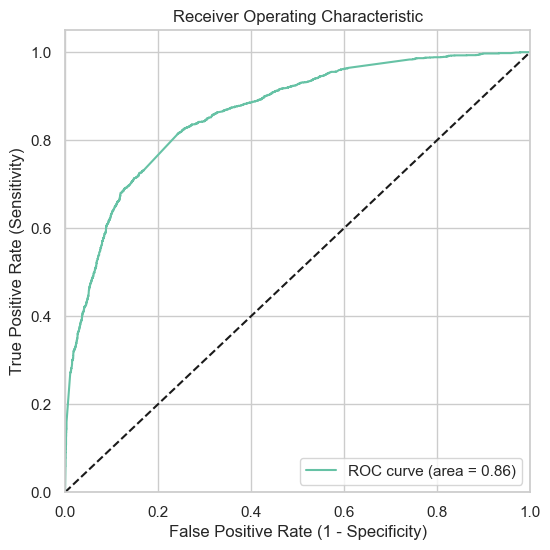

In [236]:
# Ploting ROC curve

fpr, tpr, thresholds= roc_curve(y_train_pred.Converted, y_train_pred.prob, drop_intermediate = False )
roc_plot(y_train_pred.Converted, y_train_pred.prob)

In [237]:
# Creating different label columns using different probability cutoffs

num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred[i]=  y_train_pred.prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,prob,pred_Converted,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7381,0.293299,0,0,1,1,1,0,0,0,0,0,0,0
1086,0.489819,0,0,1,1,1,1,1,0,0,0,0,0
1217,0.053955,0,0,1,0,0,0,0,0,0,0,0,0
3911,0.827900,1,1,1,1,1,1,1,1,1,1,1,0
7220,0.834779,1,1,1,1,1,1,1,1,1,1,1,0


In [238]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred[n]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    plot_df.loc[n]= [n,accuracy,sensitivity,specificity]
    
plot_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.379015,1.000000,0.000000
0.1,0.1,0.525585,0.985945,0.244606
0.2,0.2,0.695722,0.896508,0.573174
0.3,0.3,0.773204,0.827513,0.740057
0.4,0.4,0.800323,0.695911,0.864050
0.5,0.5,0.800161,0.646508,0.893943
0.6,0.6,0.788378,0.578365,0.916558
0.7,0.7,0.769007,0.487649,0.940733
0.8,0.8,0.744310,0.377768,0.968027
0.9,0.9,0.714609,0.264906,0.989082


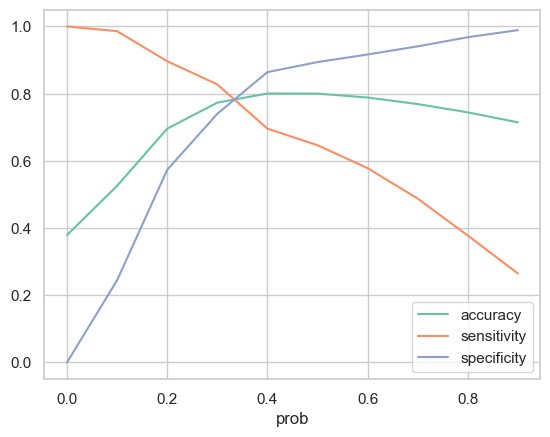

In [239]:
# Ploting Accuracy, Sensitivity and Specificity for different probability cutoffs

plot_df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.show()

In [240]:
# Creating pred_final column and generating prediction based on probability cutoff .32

y_train_pred['pred_final']= y_train_pred.prob.map(lambda x: 1 if x > .32 else 0)

In [241]:
print('Model Evaluation Metrics on Train dataset')
print('#'* 50)

# Get Confusion matrix
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# Checking Overall Model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final))

# Checking Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Checking Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Checking FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Checking Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# Checking Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Train dataset
##################################################
Confusion Matrix:
True Negative: 2902      False Positive: 945
False Negative: 430      True Positive: 1918 

Overall model accuracy: 0.778046811945117
Sensitivity / Recall:  0.8168654173764907
Specificity:  0.7543540421107356
False Positive Rate:  0.24564595788926435
Positive Predictive Value:  0.6699266503667481
Positive Predictive Value:  0.8709483793517407


In [243]:
# Adding Lead Number from initial dataframe for better understanding

y_train_pred= y_train_pred.merge(leads_data['Lead Number'], how= 'left', left_index= True, right_index= True)

# Generating Lead Score on Train dataset
y_train_pred['Lead Score']= y_train_pred.prob * 100
y_train_pred= y_train_pred[['Lead Number', 'Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_train_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
2984,631268,1,1,0.999492,99.949166
7187,594369,1,1,0.999061,99.906080
7211,594089,1,1,0.998947,99.894682
1559,643938,1,1,0.998911,99.891071
4123,620454,1,1,0.998621,99.862055
6647,598818,1,1,0.998420,99.841972
5293,609185,1,1,0.997644,99.764415
4832,613659,1,1,0.997605,99.760497
1867,641441,1,1,0.997253,99.725316
6028,603581,1,1,0.996552,99.655210


In [245]:
# Performing MinMax Scaling on test dataset

cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test_set[cols]= scaler.transform(X_test_set[cols])
X_test_set[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4676,0.0000,0.000000,0.000000
5499,0.5625,0.701630,0.333333
8862,0.3125,0.797283,0.555556
526,0.1875,0.615217,0.333333
4012,0.1875,0.559239,0.333333


In [248]:
# Keeping only required columns in our test dataset

test_cols= list(X_train_final.columns)
test_cols.remove('const')
X_test_set= X_test_set[test_cols]
X_test_set.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Country_United States,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
4676,0,0.0000,0.000000,False,True,False,False,False,False,True,False
5499,1,0.5625,0.701630,True,False,False,False,False,False,True,False
8862,0,0.3125,0.797283,True,False,False,False,False,False,True,False
526,0,0.1875,0.615217,True,False,False,False,False,False,True,False
4012,0,0.1875,0.559239,True,False,False,False,False,False,True,False


In [259]:
# Adding constant in test dataset

X_test_final= sm.add_constant(X_test_set)
X_test_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Country_United States,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
4676,1.0,0,0.0000,0.000000,False,True,False,False,False,False,True,False
5499,1.0,1,0.5625,0.701630,True,False,False,False,False,False,True,False
8862,1.0,0,0.3125,0.797283,True,False,False,False,False,False,True,False
526,1.0,0,0.1875,0.615217,True,False,False,False,False,False,True,False
4012,1.0,0,0.1875,0.559239,True,False,False,False,False,False,True,False
